In [659]:
## Lead Score - Case Study

In [660]:
##Problem Statement
#An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [661]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [662]:
## Loading and Cleaning Data

In [663]:
lead_df=pd.read_csv("leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [664]:
lead_df.shape

(9240, 37)

In [665]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [666]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [667]:
#checking for duplicates

In [668]:

sum(lead_df.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values found in prospect id

In [669]:
sum(lead_df.duplicated(subset = 'Lead Number')) == 0


True

No duplicate values found in Lead Number

In [670]:
## Cleaning the Data frame

In [671]:
# Converting all the values to lower case
lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [672]:
# Dropping Lead Number and Prospect IId since yhey all have unique values

In [673]:
lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [674]:
# Repplacing select values with NaN
lead_df = lead_df.replace('select',np.nan)

In [675]:
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [676]:
#checking null values in each rows

lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [677]:
#checking percentage of null values in each column

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [678]:
cols=lead_df.columns
# dropping columns with more thn 45% missing values
for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) >= 45):
        lead_df.drop(i, 1, inplace = True)

In [679]:
#checking null values percentage

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [ ]:
## # Since India is the most common occurence among the non-missing values we can impute all missing values with India

In [680]:
#checking value counts of Country column

lead_df['Country'].value_counts(dropna=False)

india                   6492
NaN                     2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

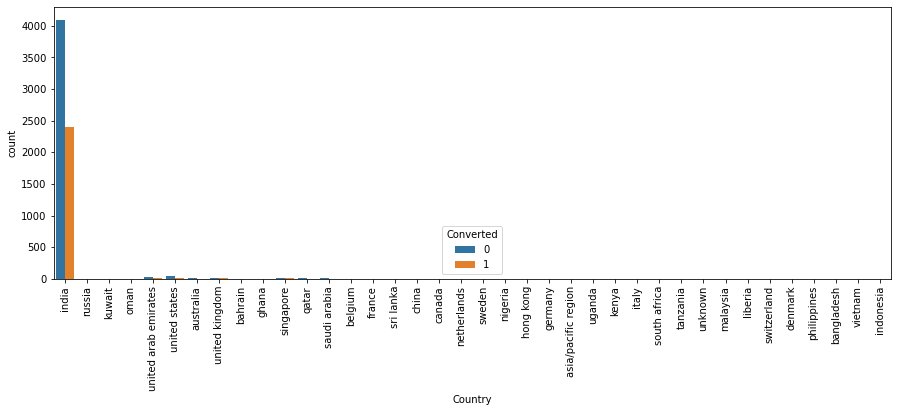

In [681]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Country, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [682]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_df['Country'] = lead_df.apply(lambda x:slots(x['Country']), axis = 1)
lead_df['Country'].value_counts()

india            6492
outside india    2748
Name: Country, dtype: int64

In [683]:
cols_to_drop=['Country']

In [684]:
lead_df['City'].value_counts(dropna=False)

NaN                            3669
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [685]:
lead_df['City'] = lead_df['City'].replace(np.nan,'mumbai')

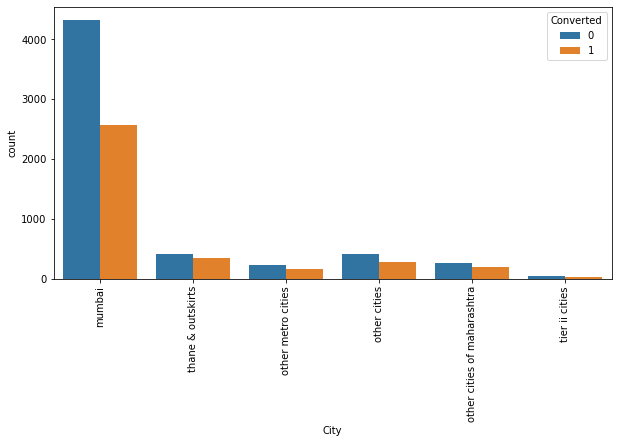

In [686]:
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_df.City, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [687]:
#checking vlue counts for specialization column
lead_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [688]:
## # Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'NA'
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'NA')

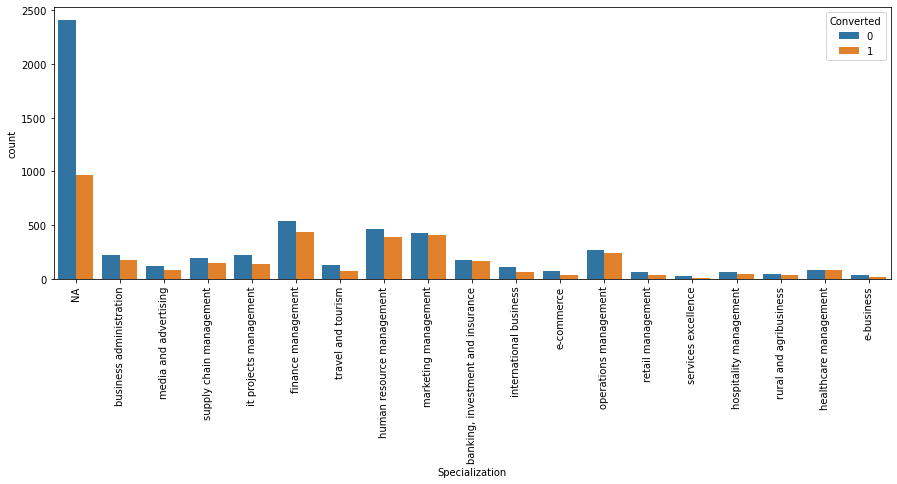

In [689]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [690]:
lead_df['Specialization'] = lead_df['Specialization'].replace(['finance management','human resource management',
                                                           'marketing management','operations management',
                                                           'it projects management','supply chain management',
                                                    'healthcare management','hospitality management',
                                                           'retail management'] ,'Management_Specializations')  

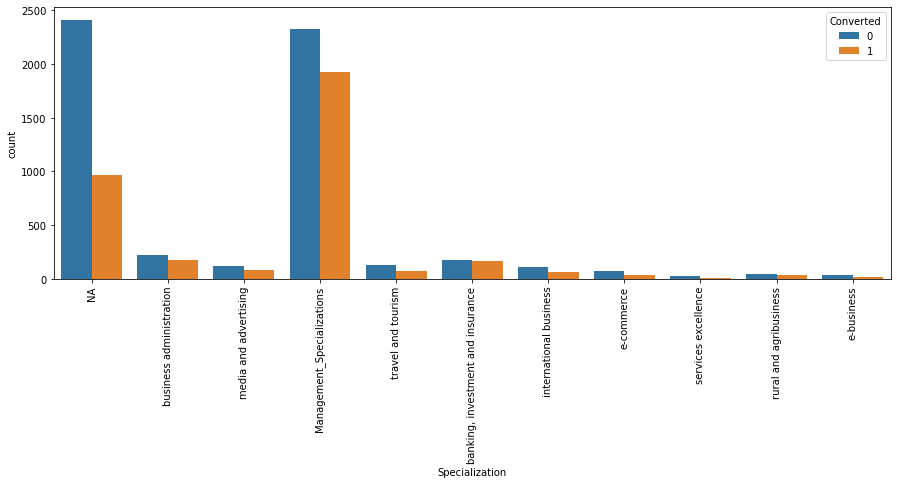

In [691]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [692]:
## What is your current occupation
lead_df['What is your current occupation'].value_counts(dropna=False)

unemployed              5600
NaN                     2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [693]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [694]:
lead_df['What is your current occupation'].value_counts(dropna=False)

unemployed              5600
Unemployed              2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

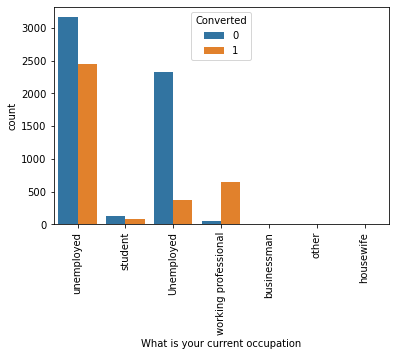

In [695]:
s1=sns.countplot(lead_df['What is your current occupation'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## Working Professionals going for the course have high chances of joining it.
## Unemployed leads are the most in terms of Absolute numbers.

In [696]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6528
NaN                          2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [697]:
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better growth')

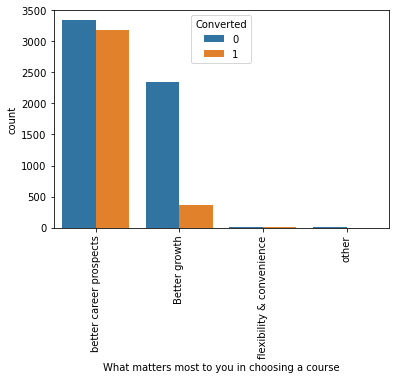

In [698]:
s1=sns.countplot(lead_df['What matters most to you in choosing a course'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [699]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6528
Better growth                2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [700]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [701]:
lead_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [702]:
lead_df['Tags'] = lead_df['Tags'].replace(np.nan,'NA')

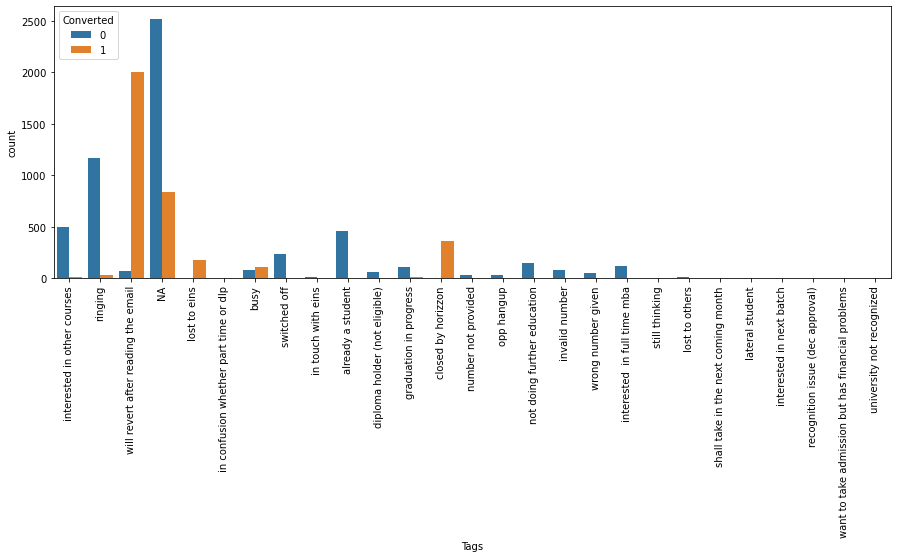

In [703]:

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Tags'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [704]:
lead_df['Tags'] = lead_df['Tags'].replace(['NA','in confusion whether part time or dlp', 'in touch with eins','diploma holder (not eligible)',
                                     'approached upfront','graduation in progress','number not provided', 'opp hangup','still thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'recognition issue (dec approval)','want to take admission but has financial problems',
                                    'university not recognized'], 'Other_Tags')

lead_df['Tags'] = lead_df['Tags'].replace(['switched off',
                                      'already a student',
                                       'not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'interested  in full time mba'] , 'Other_Tags')

In [705]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [706]:
lead_df['Lead Source'].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: Lead Source, dtype: int64

In [707]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'unknown')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('Facebook','Social Media')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','click2call','press_release',
                                                     'youtubechannel','welearnblog_home',
                                                     'welearn','blog','pay per click ads',
                                                    'testone','nc_edm'] ,'unknown')  

In [ ]:
## We can group some of the lower frequency occuring labels under a common label 'unknown'

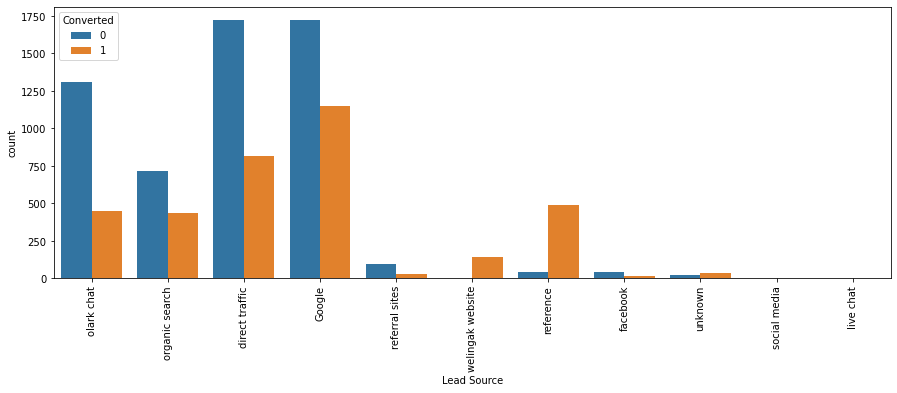

In [708]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Lead Source'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## Inference
Maximum number of leads are generated by Google and Direct traffic.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [709]:
lead_df['Last Activity'].value_counts(dropna=False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [710]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan,'unknown')
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','unreachable','unsubscribed','Unsubscribed',
                                                        'had a phone conversation', 
                                                        'approached upfront',
                                                        'view in browser link Clicked',       
                                                        'email marked spam',                  
                                                        'email received','resubscribed to emails',
                                                         'visited booth in tradeshow'],'unknown')

In [711]:
lead_df['Last Activity'].value_counts(dropna=False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
unknown                          302
email link clicked               267
form submitted on website        116
view in browser link clicked       6
Name: Last Activity, dtype: int64

In [712]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [713]:
lead_df = lead_df.dropna()

In [714]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [715]:
lead_df['Lead Origin'].value_counts(dropna=False)

landing page submission    4886
api                        3578
lead add form               608
lead import                  31
Name: Lead Origin, dtype: int64

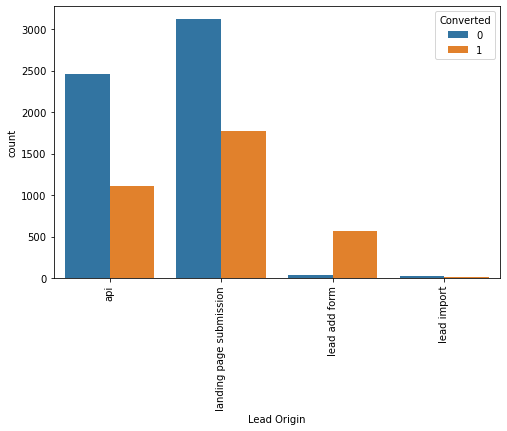

In [716]:
plt.figure(figsize=(8,5))
s1=sns.countplot(lead_df['Lead Origin'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## Inference
API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

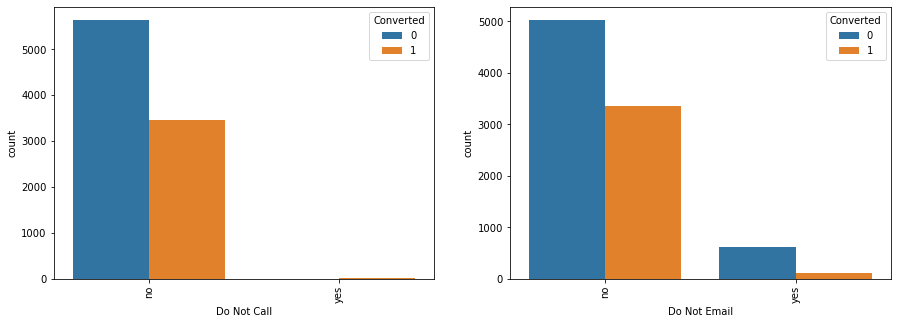

In [717]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead_df['Do Not Call'], hue=lead_df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead_df['Do Not Email'], hue=lead_df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [718]:
lead_df['Do Not Call'].value_counts(dropna=False)

no     9101
yes       2
Name: Do Not Call, dtype: int64

In [719]:
lead_df['Do Not Email'].value_counts(dropna=False)

no     8379
yes     724
Name: Do Not Email, dtype: int64

In [720]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [721]:
lead_df.Search.value_counts(dropna=False)

no     9089
yes      14
Name: Search, dtype: int64

In [722]:
lead_df.Magazine.value_counts(dropna=False)

no    9103
Name: Magazine, dtype: int64

In [723]:
lead_df['Newspaper Article'].value_counts(dropna=False)

no     9101
yes       2
Name: Newspaper Article, dtype: int64

In [724]:
lead_df['X Education Forums'].value_counts(dropna=False)

no     9102
yes       1
Name: X Education Forums, dtype: int64

In [725]:
lead_df['Newspaper'].value_counts(dropna=False)

no     9102
yes       1
Name: Newspaper, dtype: int64

In [726]:
lead_df['Digital Advertisement'].value_counts(dropna=False)

no     9099
yes       4
Name: Digital Advertisement, dtype: int64

In [727]:
lead_df['Through Recommendations'].value_counts(dropna=False)

no     9096
yes       7
Name: Through Recommendations, dtype: int64

In [728]:
lead_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

no    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [729]:
lead_df['Update me on Supply Chain Content'].value_counts(dropna=False)

no    9103
Name: Update me on Supply Chain Content, dtype: int64

In [730]:
lead_df['Get updates on DM Content'].value_counts(dropna=False)

no    9103
Name: Get updates on DM Content, dtype: int64

In [731]:
lead_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

no    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [732]:
lead_df['A free copy of Mastering The Interview'].value_counts(dropna=False)

no     6215
yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [733]:
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [734]:
lead_df['Last Notable Activity'].value_counts()

modified                        3270
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [735]:
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['had a phone conversation',
                                                                       'email marked spam',
                                                                         'unreachable',
                                                                         'unsubscribed',
                                                                         'email bounced',                                                                    
                                                                       'resubscribed to emails',
                                                                       'view in browser link clicked',
                                                                       'approached upfront', 
                                                                       'form submitted on website', 
                                                                       'email received'],'Others')

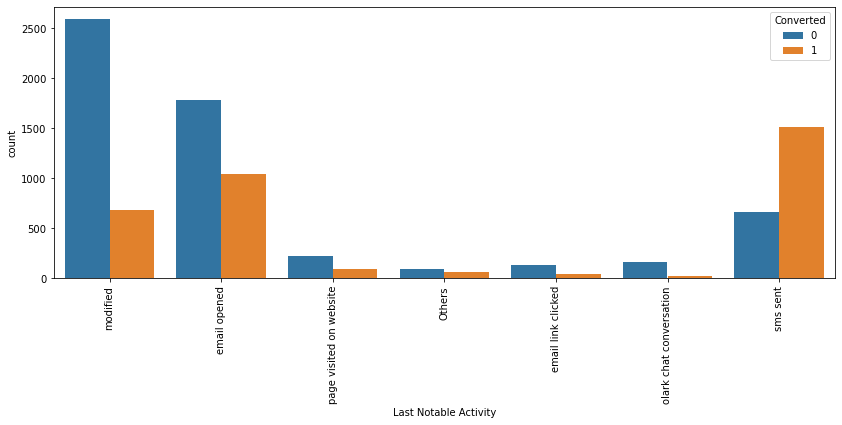

In [736]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [737]:
lead_df['Last Notable Activity'].value_counts()

modified                   3270
email opened               2827
sms sent                   2172
page visited on website     318
olark chat conversation     183
email link clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

In [738]:
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [739]:
lead_df = lead_df.drop(cols_to_drop,1)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

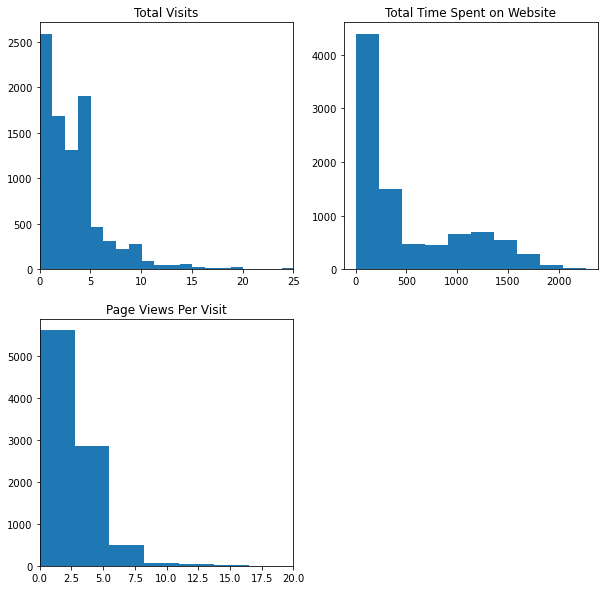

In [740]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

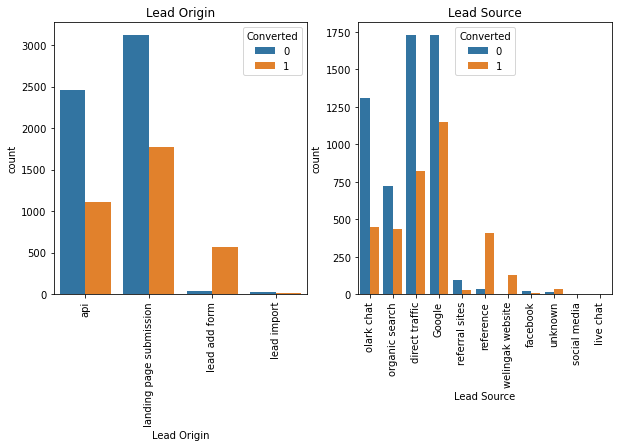

In [741]:

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

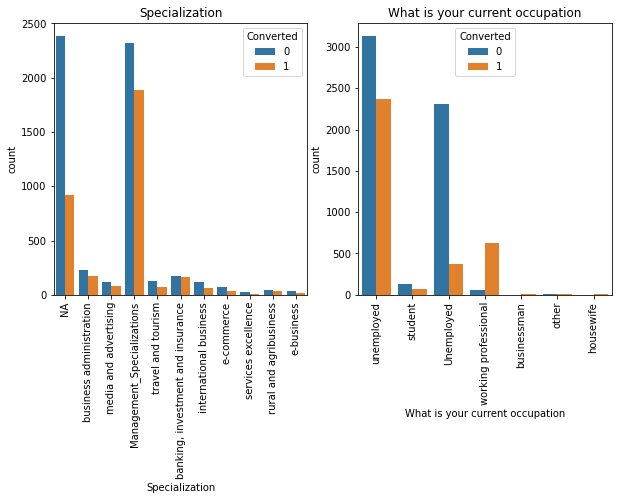

In [742]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()


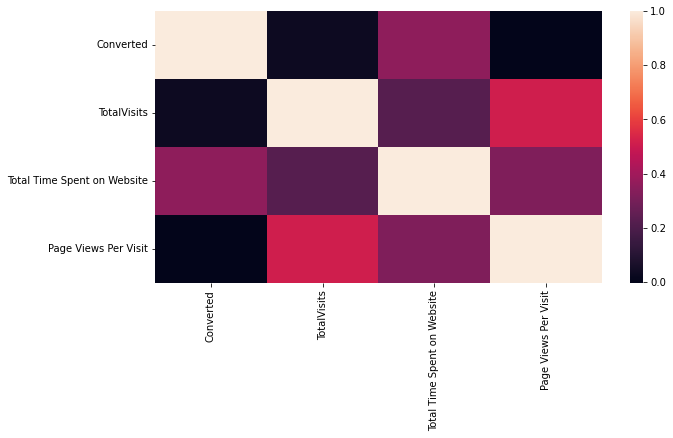

In [743]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr())
plt.show()

In [744]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

38.02043282434362

In [745]:
numeric = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
99%,17.000000,1838.960000,9.000000
max,251.000000,2272.000000,55.000000


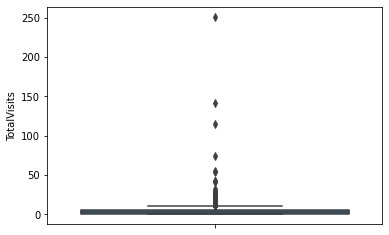

In [746]:
#checking percentile value for total visits
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [747]:

lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

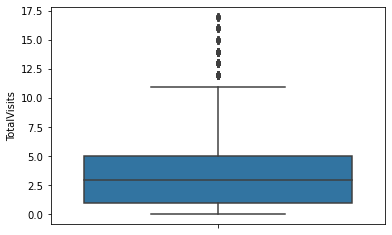

In [748]:
Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]
Q1 = lead_df.TotalVisits.quantile(0.01)
lead_df = lead_df[(lead_df.TotalVisits >= Q1)]
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [749]:
lead_df.shape

(9020, 14)

In [750]:
lead_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

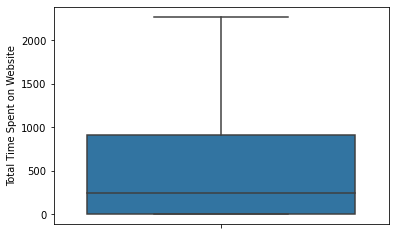

In [751]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['Total Time Spent on Website'])
plt.show()

In [752]:

lead_df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

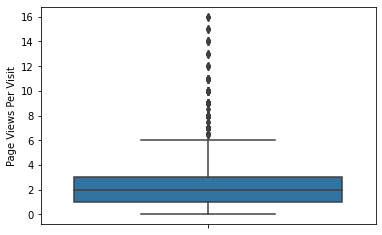

In [753]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

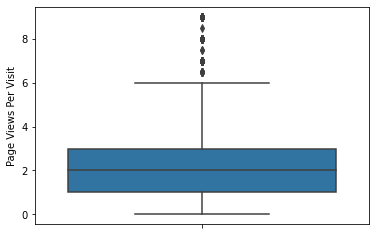

In [754]:
Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df['Page Views Per Visit'] <= Q3]
Q1 = lead_df['Page Views Per Visit'].quantile(0.01)
lead_df = lead_df[lead_df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()


In [755]:
lead_df.shape

(8953, 14)

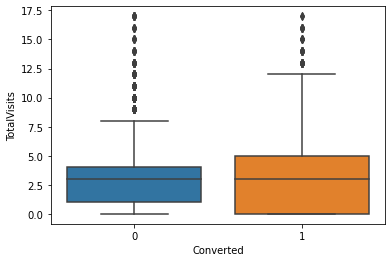

In [756]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

In [ ]:
## Inference

Median for converted and not converted leads are the close.
Nothng conclusive can be said on the basis of Total Visits

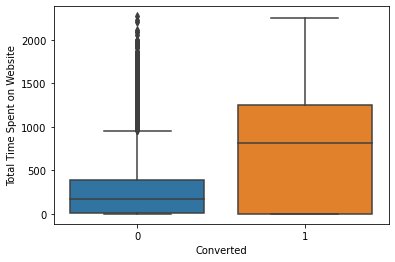

In [757]:
sns.boxplot(x=lead_df.Converted, y=lead_df['Total Time Spent on Website'])
plt.show()

In [ ]:
## Inference

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

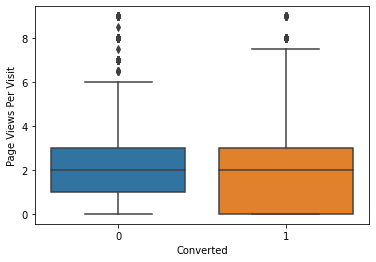

In [758]:
sns.boxplot(x=lead_df.Converted,y=lead_df['Page Views Per Visit'])
plt.show()

In [ ]:
## Inference

Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

In [759]:

round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [ ]:
## There are no missing values in the columns to be analyzed further

### Data Prepration for Model Building

#### Dummy Variable creation for categorical variables

In [760]:
#getting list of categorical columns

categ_cols = lead_df.select_dtypes(include=['object']).columns
categ_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [761]:
#List of variable with Yes No values which needs too be mapped

varlist=['A free copy of Mastering The Interview','Do Not Email']

#Defining the Map Funtion

def binary_map(x):
    return x.map({"Yes":1 , "No":0})

#Applying the function to varlist
lead_df[varlist]=lead_df[varlist].apply(binary_map)


In [762]:
#getting dummies and dropping the first columns

dummy = pd.get_dummies(lead_df[['Lead Origin','What is your current occupation', 'City']],drop_first=True)

#Adding the resultant dummy to min dataframe
lead_df = pd.concat([lead_df,dummy],1)

In [763]:
# Creting dummies for Specialization and removing the column with NA values
dummy=pd.get_dummies(lead_df['Specialization'],prefix='Specialization')
dummy = dummy.drop(['Specialization_NA'],1)
lead_df = pd.concat([lead_df,dummy],1)

In [764]:
# Creting dummies for Lead Source and removing the column with unknown values
dummy=pd.get_dummies(lead_df['Lead Source'],prefix='Lead Source')
#dummy.info()
dummy = dummy.drop(['Lead Source_unknown'],1)
lead_df = pd.concat([lead_df,dummy],1)

In [765]:
# Creting dummies for Last Activity and removing the column with unknown values
dummy=pd.get_dummies(lead_df['Last Activity'],prefix='Last Activity')
#dummy.info()
dummy = dummy.drop(['Last Activity_unknown'],1)
lead_df = pd.concat([lead_df,dummy],1)

In [766]:
# Creting dummies for Last Notable Activity and removing the column with unknown values
dummy=pd.get_dummies(lead_df['Last Notable Activity'],prefix='Last Notable Activity')
#dummy.info()
dummy = dummy.drop(['Last Notable Activity_Others'],1)
lead_df = pd.concat([lead_df,dummy],1)

In [767]:
# Creting dummies for Tags and removing the column with unknown values
dummy=pd.get_dummies(lead_df['Tags'],prefix='Tags')
#dummy.info()
dummy = dummy.drop(['Tags_Other_Tags'],1)
lead_df = pd.concat([lead_df,dummy],1)

In [768]:
# dropping original columns after creating the dummies
lead_df.drop(categ_cols, 1 , inplace=True)

In [769]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,...,Tags_busy,Tags_closed by horizzon,Tags_interested in next batch,Tags_interested in other courses,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_ringing,Tags_shall take in the next coming month,Tags_will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Train Test Split

In [770]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_df['Converted']

y.head()

X=lead_df.drop('Converted', axis=1)

In [771]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [772]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_landing page submission                   6267 non-null   uint8  
 4   Lead Origin_lead add form                             6267 non-null   uint8  
 5   Lead Origin_lead import                               6267 non-null   uint8  
 6   What is your current occupation_businessman           6267 non-null   uint8  
 7   What is your current occupation_housewife             6267 non-null   uint8  
 8   What is your current occupation_other                 6

### Scaling

In [773]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,...,Tags_busy,Tags_closed by horizzon,Tags_interested in next batch,Tags_interested in other courses,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_ringing,Tags_shall take in the next coming month,Tags_will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Model Building using Stats Model & RFE:

In [774]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(log_reg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [775]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_landing page submission', False, 10),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 33),
 ('What is your current occupation_businessman', False, 29),
 ('What is your current occupation_housewife', False, 19),
 ('What is your current occupation_other', False, 31),
 ('What is your current occupation_student', False, 21),
 ('What is your current occupation_unemployed', False, 15),
 ('What is your current occupation_working professional', False, 9),
 ('City_other cities', False, 41),
 ('City_other cities of maharashtra', False, 28),
 ('City_other metro cities', False, 46),
 ('City_thane & outskirts', False, 30),
 ('City_tier ii cities', False, 44),
 ('Specialization_Management_Specializations', False, 40),
 ('Specialization_banking, investment and insurance', False, 17),
 ('Specialization_business administration', False, 34),
 ('Specia

In [776]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Last Activity_sms sent', 'Last Notable Activity_email link clicked',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation', 'Tags_busy',
       'Tags_closed by horizzon', 'Tags_interested in other courses',
       'Tags_lateral student', 'Tags_lost to eins', 'Tags_ringing',
       'Tags_will revert after reading the email'],
      dtype='object')

In [777]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead import',
       'What is your current occupation_businessman',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'City_other cities', 'City_other cities of maharashtra',
       'City_other metro cities', 'City_thane & outskirts',
       'City_tier ii cities', 'Specialization_Management_Specializations',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_international business',
       'Specialization_media and advertising',
       'Specialization_rural and agribusiness',
       'Specialization

In [778]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
log_m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1495.1
Date:                Sat, 12 Nov 2022   Deviance:                       2990.3
Time:                        23:20:11   Pearson chi2:                 1.11e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5732
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4507      0.078    -18.523      0.000      -1.604      -1.297
Lead Origin_lead add form                         0.5197      0.432      1.203      0.229      -0.327       1.367
Lead Source_direct traffic                       -0.8358      0.114     -7.339      0.000      -1.059      -0.613
Lead Source_referral sites                       -0.3242      0.433     -0.748      0.454      -1.174       0.525
Lead Source_welingak website                      4.7717      1.111      4.297      0.000       2.595       6.948
Last Activity_sms sent                            1.9468      0.102     19.062      0.000       1.747       2.147
Last Notable Activity_email link clicked         -1.5498      0.475     -3.265      0.001      -2.480      -0.620
Last Notable Activity_modified                   -1.6988      0.118    -14.456      0.000      -1.929      -1.468
Last Notable Activity_olark chat conversation    -1.6850      0.465     -3.621      0.000      -2.597      -0.773
Tags_busy                                         1.1286      0.211      5.338      0.000       0.714       1.543
Tags_closed by horizzon                           7.9064      1.017      7.776      0.000       5.913       9.899
Tags_interested in other courses                 -1.4319      0.375     -3.817      0.000      -2.167      -0.697
Tags_lateral student                             22.3403   1.62e+04      0.001      0.999   -3.18e+04    3.19e+04
Tags_lost to eins                                 6.6640      0.603     11.050      0.000       5.482       7.846
Tags_ringing                                     -2.7846      0.224    -12.432      0.000      -3.224      -2.346
Tags_will revert after reading the email          5.1861      0.182     28.421      0.000       4.828       5.544
=================================================================================================================
"""

p-value of Tags_lateral student is high nd hence can be dropped.

In [779]:
#dropping column with high p-value

col = col.drop('Tags_lateral student',1)

In [780]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1498.3
Date:                Sat, 12 Nov 2022   Deviance:                       2996.7
Time:                        23:20:13   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5728
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4526      0.078    -18.545      0.000      -1.606      -1.299
Lead Origin_lead add form                         0.5638      0.427      1.322      0.186      -0.272       1.400
Lead Source_direct traffic                       -0.8399      0.114     -7.378      0.000      -1.063      -0.617
Lead Source_referral sites                       -0.3249      0.433     -0.750      0.453      -1.174       0.525
Lead Source_welingak website                      4.7229      1.108      4.262      0.000       2.551       6.895
Last Activity_sms sent                            1.9570      0.102     19.183      0.000       1.757       2.157
Last Notable Activity_email link clicked         -1.5446      0.474     -3.258      0.001      -2.474      -0.615
Last Notable Activity_modified                   -1.6833      0.117    -14.400      0.000      -1.912      -1.454
Last Notable Activity_olark chat conversation    -1.6824      0.465     -3.617      0.000      -2.594      -0.771
Tags_busy                                         1.1230      0.211      5.310      0.000       0.709       1.537
Tags_closed by horizzon                           7.8855      1.016      7.760      0.000       5.894       9.877
Tags_interested in other courses                 -1.4390      0.375     -3.835      0.000      -2.174      -0.704
Tags_lost to eins                                 6.6543      0.603     11.035      0.000       5.472       7.836
Tags_ringing                                     -2.7932      0.224    -12.466      0.000      -3.232      -2.354
Tags_will revert after reading the email          5.1789      0.182     28.419      0.000       4.822       5.536
=================================================================================================================
"""

p-value of Lead Source_referral sites is high and hence can be dropped.

In [782]:
#dropping column with high p-value

col = col.drop('Lead Source_referral sites',1)

In [783]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1498.6
Date:                Sat, 12 Nov 2022   Deviance:                       2997.3
Time:                        23:21:26   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5728
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4600      0.078    -18.771      0.000      -1.612      -1.308
Lead Origin_lead add form                         0.5695      0.426      1.336      0.182      -0.266       1.405
Lead Source_direct traffic                       -0.8342      0.114     -7.343      0.000      -1.057      -0.612
Lead Source_welingak website                      4.7236      1.108      4.262      0.000       2.552       6.896
Last Activity_sms sent                            1.9608      0.102     19.242      0.000       1.761       2.161
Last Notable Activity_email link clicked         -1.5482      0.476     -3.256      0.001      -2.480      -0.616
Last Notable Activity_modified                   -1.6809      0.117    -14.384      0.000      -1.910      -1.452
Last Notable Activity_olark chat conversation    -1.6771      0.465     -3.607      0.000      -2.588      -0.766
Tags_busy                                         1.1229      0.211      5.311      0.000       0.709       1.537
Tags_closed by horizzon                           7.8871      1.016      7.761      0.000       5.895       9.879
Tags_interested in other courses                 -1.4623      0.375     -3.900      0.000      -2.197      -0.727
Tags_lost to eins                                 6.6560      0.603     11.039      0.000       5.474       7.838
Tags_ringing                                     -2.7916      0.224    -12.459      0.000      -3.231      -2.352
Tags_will revert after reading the email          5.1756      0.182     28.424      0.000       4.819       5.533
=================================================================================================================
"""

p-value of Lead Origin_lead add form is high nad hence removing it

In [784]:
#dropping column with high p-value

col = col.drop('Lead Origin_lead add form',1)

In [785]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1499.6
Date:                Sat, 12 Nov 2022   Deviance:                       2999.1
Time:                        23:21:27   Pearson chi2:                 1.18e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5726
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4542      0.078    -18.739      0.000      -1.606      -1.302
Lead Source_direct traffic                       -0.8494      0.113     -7.498      0.000      -1.071      -0.627
Lead Source_welingak website                      5.2879      1.025      5.160      0.000       3.280       7.296
Last Activity_sms sent                            1.9696      0.102     19.369      0.000       1.770       2.169
Last Notable Activity_email link clicked         -1.5497      0.475     -3.265      0.001      -2.480      -0.619
Last Notable Activity_modified                   -1.6894      0.117    -14.464      0.000      -1.918      -1.460
Last Notable Activity_olark chat conversation    -1.6853      0.466     -3.618      0.000      -2.598      -0.772
Tags_busy                                         1.1183      0.212      5.285      0.000       0.704       1.533
Tags_closed by horizzon                           8.0678      1.010      7.991      0.000       6.089      10.047
Tags_interested in other courses                 -1.4597      0.375     -3.890      0.000      -2.195      -0.724
Tags_lost to eins                                 6.6789      0.603     11.082      0.000       5.498       7.860
Tags_ringing                                     -2.7720      0.223    -12.438      0.000      -3.209      -2.335
Tags_will revert after reading the email          5.2118      0.180     28.902      0.000       4.858       5.565
=================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [786]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_closed by horizzon,1.05
6,Tags_busy,1.04
9,Tags_lost to eins,1.04
1,Lead Source_welingak website,1.03
3,Last Notable Activity_email link clicked,1.02
5,Last Notable Activity_olark chat conversation,1.00
8,Tags_interested in other courses,0.28
0,Lead Source_direct traffic,0.14
4,Last Notable Activity_modified,0.12
11,Tags_will revert after reading the email,0.12


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [787]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.094777
4696    0.042857
3274    0.626061
2164    0.009919
1667    0.977193
7024    0.189352
8018    0.041506
778     0.236125
6942    0.041343
4440    0.090821
dtype: float64

In [788]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0947771 , 0.04285716, 0.62606149, 0.00991938, 0.97719293,
       0.18935232, 0.0415064 , 0.23612509, 0.04134326, 0.09082107])

In [789]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.094777,9196
1,0,0.042857,4696
2,0,0.626061,3274
3,0,0.009919,2164
4,1,0.977193,1667


In [790]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.094777,9196,0
1,0,0.042857,4696,0
2,0,0.626061,3274,1
3,0,0.009919,2164,0
4,1,0.977193,1667,1


In [791]:
#Model Evaluation Metrics
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3711  171]
 [ 370 2015]]


In [792]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9136748045316738


In [793]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [794]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.8448637316561844

In [795]:
# Let us calculate specificity
TN / float(TN+FP)

0.9559505409582689

In [796]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04404945904173107


In [797]:
# positive predictive value 
print (TP / float(TP+FP))

0.9217749313815188


In [798]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9093359470717961


### Plotting ROC Curve

In [799]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [800]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

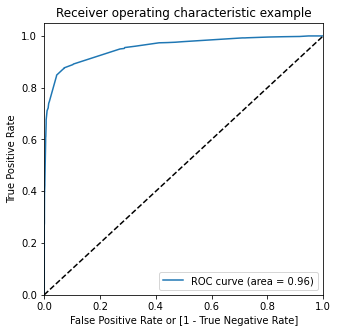

In [801]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.96 indicating a good predictive model.

### Finding Optimal Cutoff Point

In [802]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.094777,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.042857,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.626061,3274,1,1,1,1,1,1,1,1,0,0,0
3,0,0.009919,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.977193,1667,1,1,1,1,1,1,1,1,1,1,1


In [803]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.804213  0.955136  0.711489
0.2   0.2  0.893889  0.891405  0.895415
0.3   0.3  0.908409  0.874633  0.929160
0.4   0.4  0.908409  0.874633  0.929160
0.5   0.5  0.913675  0.844864  0.955951
0.6   0.6  0.913675  0.844864  0.955951
0.7   0.7  0.891016  0.740042  0.983771
0.8   0.8  0.885432  0.722432  0.985574
0.9   0.9  0.872347  0.675891  0.993045


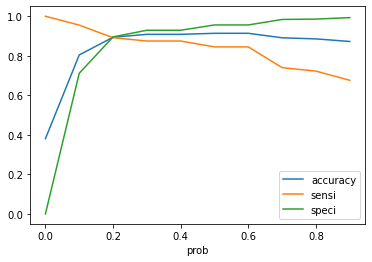

In [804]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [805]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.094777,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.042857,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.626061,3274,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.009919,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.977193,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [806]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.094777,9196,0,9
1,0,0.042857,4696,0,4
2,0,0.626061,3274,1,63
3,0,0.009919,2164,0,1
4,1,0.977193,1667,1,98


In [807]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.893888622945588

In [808]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3476,  406],
       [ 259, 2126]], dtype=int64)

In [809]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [810]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8914046121593291

In [811]:
# Let us calculate specificity
TN / float(TN+FP)

0.895414734672849

### Observation:
So the above the model seems to be performing well. The ROC curve has a value of 0.9, which is very good. We have the following values for the Train Data:

Accuracy : 89.38%
Sensitivity : 89.14%
Specificity : 89.54%
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [812]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score

In [813]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.839652448657188

In [814]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8914046121593291

In [815]:
from sklearn.metrics import precision_recall_curve

In [816]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

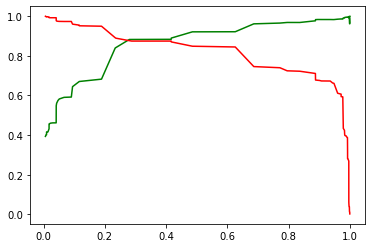

In [817]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Model Evaluation on Test Set

#### Scaaling Test Set

In [818]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,...,Tags_busy,Tags_closed by horizzon,Tags_interested in next batch,Tags_interested in other courses,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_ringing,Tags_shall take in the next coming month,Tags_will revert after reading the email
7681,0.668862,-0.304384,0.135997,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
984,-0.030697,-0.538073,0.399961,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8135,-0.380477,0.794688,-0.127967,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0.319082,-0.614753,-0.127967,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2712,-0.030697,-0.412100,0.399961,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [819]:
X_test = X_test[col]
X_test.head()

,Lead Source_direct traffic,Lead Source_welingak website,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Tags_busy,Tags_closed by horizzon,Tags_interested in other courses,Tags_lost to eins,Tags_ringing,Tags_will revert after reading the email
7681,1,0,1,0,0,0,0,0,0,0,1,0
984,0,0,1,0,1,0,0,0,0,0,0,0
8135,1,0,1,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,1,0
2712,0,0,0,0,0,0,0,0,0,0,0,1


In [820]:
X_test_sm = sm.add_constant(X_test)

### Prediction on test set

In [821]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.042857
984     0.236125
8135    0.417251
6915    0.014397
2712    0.977193
244     0.002690
4698    0.189352
8287    0.041343
6791    0.977193
8970    0.009919
dtype: float64

In [822]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.042857
984,0.236125
8135,0.417251
6915,0.014397
2712,0.977193


In [823]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [824]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [825]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [826]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [827]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.042857
1,0,984,0.236125
2,0,8135,0.417251
3,0,6915,0.014397
4,1,2712,0.977193


In [828]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.042857
1,0,984,0.236125
2,0,8135,0.417251
3,0,6915,0.014397
4,1,2712,0.977193


In [829]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.042857,4
1,984,0,0.236125,24
2,8135,0,0.417251,42
3,6915,0,0.014397,1
4,2712,1,0.977193,98


In [830]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.042857,4,0
1,984,0,0.236125,24,1
2,8135,0,0.417251,42,1
3,6915,0,0.014397,1,0
4,2712,1,0.977193,98,1


In [831]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8994787788533135

In [832]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1515,  161],
       [ 109,  901]], dtype=int64)

In [833]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [834]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8920792079207921

In [835]:
# Let us calculate specificity
TN / float(TN+FP)

0.9039379474940334

In [836]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8483992467043314

In [837]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8920792079207921

### Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 89.94%
Sensitivity : 89.20%
Specificity : 90.39%


### Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 

Accuracy : 89.38%
Sensitivity : 89.14%
Specificity : 89.54%

Test Data:

Accuracy : 89.94%
Sensitivity : 89.20%
Specificity : 90.39%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model